## Import dataset

In [1]:
import pandas as pd

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,3337150000,0,0
2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,3998590000,0,0
2022-08-11,4227.399902,4257.910156,4201.410156,4207.270020,3925060000,0,0


In [6]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-15'],
              dtype='datetime64[ns]', name='Date', length=18273, freq=None)

## Cleaning data

<AxesSubplot:xlabel='Date'>

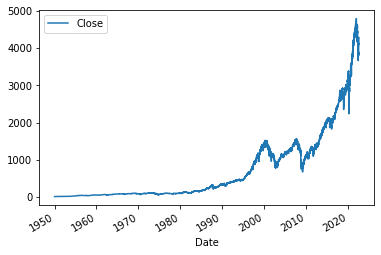

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

#### Will the price go up or down tomorrow?

In [9]:
 sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
 sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
 sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,3337150000,4210.240234,1
2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,3998590000,4207.270020,0
2022-08-11,4227.399902,4257.910156,4201.410156,4207.270020,3925060000,4280.149902,1


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,3337150000,4210.240234,1
2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,3998590000,4207.270020,0
2022-08-11,4227.399902,4257.910156,4201.410156,4207.270020,3925060000,4280.149902,1


## Training an initial ML model

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)


# All rows except the last 100 into the training set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

What percentage of the time did the market actually go up when we said it would go up?


In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
preds = pd.Series(preds, index=test.index)
preds

Date
2022-03-23    1
2022-03-24    1
2022-03-25    1
2022-03-28    1
2022-03-29    1
             ..
2022-08-09    1
2022-08-10    0
2022-08-11    0
2022-08-12    1
2022-08-15    1
Length: 100, dtype: int64

In [17]:
precision_score(test["Target"], preds)

0.5263157894736842

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

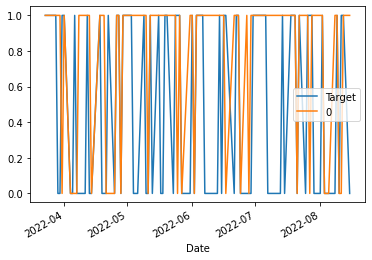

In [19]:
combined.plot()

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors, start=2500, step=250)
predictions

,Target,Predictions
Date,,
1999-11-22,0,0
1999-11-23,1,0
1999-11-24,0,0
1999-11-26,0,0
1999-11-29,0,0
...,...,...
2022-08-09,1,1
2022-08-10,0,1
2022-08-11,1,0


In [23]:
predictions["Predictions"].value_counts()

0    3337
1    2382
Name: Predictions, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.535264483627204

In [25]:
precision_score(predictions["Target"], predictions["Predictions"])

0.535264483627204

In [26]:
# Is that good enough? Lets look at the value counts of the target

predictions["Target"].value_counts() / predictions.shape[0] * 100

1    53.628257
0    46.371743
Name: Target, dtype: float64

### Adding additional predictors

In [27]:
horizons = [2,5,60, 250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,3337150000,4210.240234,1,0.997871,0.0,0.995053,1.0,1.043109,28.0,0.946425,124.0,1.171945,546.0
2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,3998590000,4207.270020,0,1.010533,1.0,1.013544,1.0,1.064481,28.0,0.966798,124.0,1.196436,546.0
2022-08-11,4227.399902,4257.910156,4201.410156,4207.270020,3925060000,4280.149902,1,0.999647,1.0,1.010138,1.0,1.062838,28.0,0.966347,123.0,1.195135,545.0


In [29]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,4155.930176,4186.620117,4128.970215,4140.060059,3604650000,4122.470215,0,0.999381,0.0,1.000810,1.0,1.048411,28.0,0.950184,125.0,1.177371,547.0
2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,3337150000,4210.240234,1,0.997871,0.0,0.995053,1.0,1.043109,28.0,0.946425,124.0,1.171945,546.0
2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,3998590000,4207.270020,0,1.010533,1.0,1.013544,1.0,1.064481,28.0,0.966798,124.0,1.196436,546.0


## Improving the model

In [30]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=100, random_state=1)

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1 
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
predictions = backtest(sp500, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

0.0    3883
1.0     835
Name: Predictions, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])

0.577245508982036

## Improve - next steps

- gridsearch on randomforest
- timeseries ARIMA
- fb prophet

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,4155.930176,4186.620117,4128.970215,4140.060059,3604650000,4122.470215,0,0.999381,0.0,1.000810,1.0,1.048411,28.0,0.950184,125.0,1.177371,547.0
2022-08-09,4133.109863,4137.299805,4112.089844,4122.470215,3337150000,4210.240234,1,0.997871,0.0,0.995053,1.0,1.043109,28.0,0.946425,124.0,1.171945,546.0
2022-08-10,4181.020020,4211.029785,4177.259766,4210.240234,3998590000,4207.270020,0,1.010533,1.0,1.013544,1.0,1.064481,28.0,0.966798,124.0,1.196436,546.0


In [36]:
sp500.shape

(7218, 17)

## ARIMA

### Ensure Stationarity ADF test


In [37]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(sp500["Close"])[1])

p-value:  0.9963191914183812


The time series is not stationary

In [38]:
# First diff
print('p-value: ', adfuller(sp500["Close"].diff(1).fillna(0))[1])

p-value:  1.0379304826072871e-26


In [39]:
# Second diff
print('p-value: ', adfuller(sp500["Close"].diff(1).diff(1).fillna(0))[1])

p-value:  0.0


#### ACF visualization with differencing


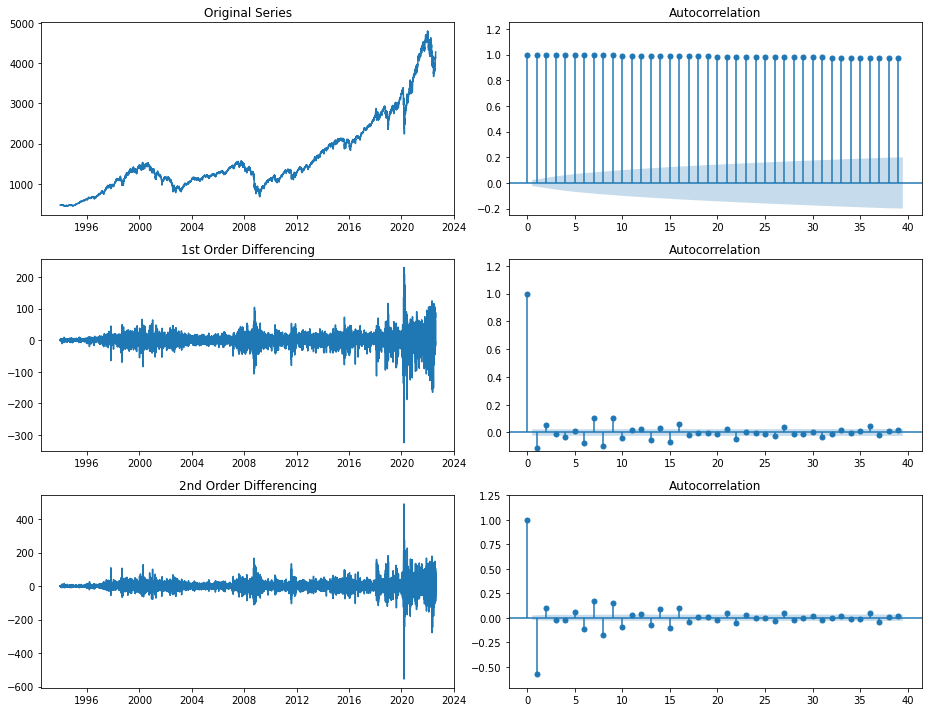

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(sp500["Close"]); axes[0, 0].set_title('Original Series')
plot_acf(sp500["Close"], auto_ylims=True,ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sp500["Close"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sp500["Close"].diff().dropna(), auto_ylims=True,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sp500["Close"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sp500["Close"].diff().diff().dropna(), auto_ylims=True, ax=axes[2, 1])

plt.tight_layout()

In [41]:
y_diff = sp500["Close"].diff().dropna()

### Select AR order (p) and MA order (q)

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Plot ACF to find hyperparameter q

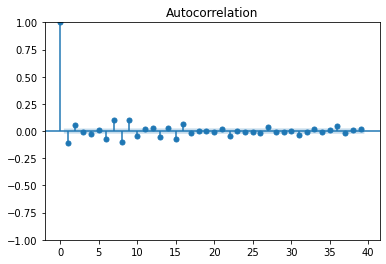

In [43]:
plot_acf(y_diff);

Plot PACF to find hyperparameter p

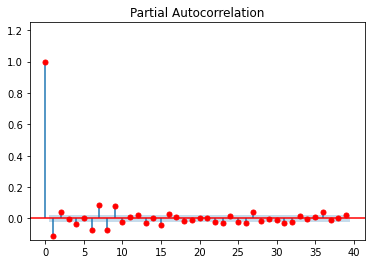

In [44]:
plot_pacf(y_diff, method='ywm', auto_ylims=True, c='r');

### Build the model

In [45]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(sp500["Close"], order=(1,1,1), trend='t')

arima = arima.fit()

arima.summary()

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 7218
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32348.498
Date:                Mon, 15 Aug 2022   AIC                          64704.997
Time:                        17:46:59   BIC                          64732.533
Sample:                             0   HQIC                         64714.471
                               - 7218                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5286      0.243      2.172      0.030       0.052       1.006
ar.L1         -0.3654      0.027    -13.455      0.000      -0.419      -0.312
ma.L1          0.2577      0.029      8.989      0.000       0.202       0.314
sigma2       458.0057      2.354    194.586      0.000     453.392     462.619
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            146238.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               6.41   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Grid search for best parameters

In [46]:
sp500.shape

(7218, 17)

In [47]:
y = sp500["Close"]

In [48]:
y_train = y[:5770]
y_test = y[5770:]
arima = ARIMA(y_train, order=(1, 1, 1), trend='t').fit()

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
import pmdarima as pm

model = pm.auto_arima(y_train, 
                      start_p=0, max_p=3,
                      start_q=0, max_q=3, 
                      d=None,
                      test='adf',
                      trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46756.901, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46741.416, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46739.963, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46757.487, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46725.306, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=46727.199, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=46727.197, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=46733.495, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=46734.539, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=46729.279, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=46727.144, Time=0.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.332 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

## ARIMA

### Visualize

In [ ]:
df = sp500.copy()
df = df[["Close"]]
df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Close"])
plt.xlabel("Year")
plt.ylabel("Closing price")
plt.title("SP500 Closing price")


### Is is stationary?

#### ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(df.Close)[1]  # p-value

The data is not stationary as we do not have a p-value of less than 0.05

#### Decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Close"], model="multiplicative", period=365)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)


In [ ]:
import numpy as np
result._resid.dropna(inplace=True)
result._resid

In [ ]:
result._resid.value_counts().sum()

ADF test on Residuals

In [ ]:

adfuller(result._resid)[1]  # p-value

### Convert non-stationary to stationary

#### Differencing

In [ ]:
zero_diff = df.Close
first_order_diff = df.Close.diff(1)
second_order_diff = df.Close.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

### Train-Test split

In [ ]:
df.shape

In [ ]:
y = df.Close

train_size = 0.8
index = round(train_size*df.shape[0])

df_train = df.iloc[:index]
df_test = df.iloc[index:]

In [ ]:
df_train, df_test

### Auto ARIMA

In [ ]:
import pmdarima as pm

smodel = pm.auto_arima(df["Close"],
                      start_p=1, max_p=2,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=False,
                       trace=True)

### ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
fitted = model.fit()

### Model Prediction

In [ ]:
df_test.shape

In [ ]:
fc, se, conf = fitted.forecast(1441, alpha=0.05)
fc_series = pd.Series(fc, index=df_test.index)


### Baseline model

In [ ]:
y_pred = df_test.shift(1)
y_pred

In [ ]:
y_pred = df_test.shift(1).dropna()
y_true = df_test[1:]

from sklearn.metrics import r2_score

r2_score(y_pred, y_true)

### Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
result_add = seasonal_decompose(sp500["Close"], model='additive')
result_add.plot()

The trend is not stationary. We need to apply differencing to make it stationary

### Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(df.Close)[1]  # p-value

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(df.Close, lags=50, ax=axes[0]);
plot_pacf(df.Close, lags=50, ax=axes[1], color='r');

### Differencing

In [ ]:
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

In [ ]:
y_diff = y.diff().dropna()

In [ ]:
# Let's remove seasons
df['deseasonalized'] = df.Close.values/result_mul.seasonal

plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(df.deseasonalized);
plt.title('Drug Sales Deseasonalized', fontsize=16);

# Also remove exponential trend 
df['linearized'] = np.log(df['deseasonalized'])

plt.subplot(1,2,2); plt.plot(df['linearized'])
plt.title('Drug Sales Linearized', fontsize=16);

### Plot ACF and PACF

In [ ]:
plot_acf(result._resid);

In [ ]:
plot_acf(y);

In [ ]:
plot_pacf(result._resid, c="r");

In [ ]:
#plt.plot(figsize=(10, 8))
plot_pacf(y, method="ywm", c="r");


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_diff);

In [ ]:
plot_pacf(y_diff, method="ywm", c="r");